## In the Name of God
<h2>Information Retrival Using Cranfield Corpus

<h2>Problem Definition</h2>
The Cranfield collection is a standard IR text collection, consisting of
1400 documents from the aerodynamics field.
To complete this assignment, you are encouraged to use the pre-processing
tools implemented during previous assignments.
<br><br>1- Implement an indexing scheme based on the vectorial model, as discussed in class. The steps pointed out in class can be used as guidelines for the implementation. For weighting, use (1) the TF/IDF weighting scheme, and (2) select an additional weighting scheme from Salton&Buckley paper on "Term weighting". Select a scheme that in your opinion should lead to high retrieval efficiency. which means that the criterion for deciding on a weighting scheme should be efficiency, rather than simplicity! Add this weighting scheme to your indexing program.
<br><br>2- For each of the ten queries provided on the quries list, determine a
ranked list of documents, in descending order of their similarity with the query. The output of your retrieval should be a list of (query_id, document_id) pairs.
Determine the average precision and recall for the ten queries, when you use:
<ui>
    <li>top 10 documents in the ranking
    <li>top 50 documents in the ranking
    <li>top 100 documents in the ranking
    <li>top 500 documents in the ranking
</ui>
<br><br>Repeat this experiment for the second weighting scheme you selected from the Salton&Buckley paper.
Which weighting scheme provides better results?
A list of relevant documents for each query is provided on another file, such that you can determine precision and recall.

<h3>Importing required packages

In [1]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.book import FreqDist
import pandas as pd
import numpy as np
from math import log10  ## For IDF formula

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
#Testing the existence of the file
f = open("../cran/cran.all.1400","r")
# if the file mode is set on reading
if f.mode == 'r':
    # print 4 the first 4 lines
    for i in range(0,4):
        print(f.readline())
f.close()

.I 1

.T

experimental investigation of the aerodynamics of a

wing in a slipstream .



In [3]:
f = open("../cran/cran.all.1400","r")
# split each line of the file into a list
data = f.readlines()
# make a copy for rainy day
copy = data
# data

In [4]:
# import regular expression library

data = copy
ptr = []
temp = []
x = ''
for sentence in data:
    # pattern to find either tags [.W, .T, .B, .A except .I with its numbers]
    ptr = re.findall("^\.[A-Z]\s*$", sentence)
    # pattern to find .I cases which are followed by document numbers
    newdoc = re.findall("^\.[A-Z]\s[0-9]+", sentence)
    # the reason of creating 2 patterns is to divide each document into an index of a list
    if ptr:
        x = sentence.replace(ptr[0],"")
    elif newdoc:
        temp.append(x)
        x = ''
    else:
        x += sentence
temp.pop(0)
temp.append(x)
for i in range(len(temp)):
    # remove any non-alphanumeric characters
    temp[i] = re.sub(r'[^A-Za-z0-9\s]',' ',temp[i])

# Tokenizing 
token = []
for i in range(0,len(temp)):
    token.append(temp[i].split())

In [5]:
# Stemming and removing stopwords

stopwords = set(stopwords.words('english'))
# Using porter-stemmer to stem each non-stopword words

ps = PorterStemmer()
ps_token = token
# repeat the loop 4 times to make sure there is nothing left
for c in range(0,4):
    for i in range(len(ps_token)):
        for j in range(len(ps_token[i])):
            if j == len(ps_token[i]):
                break
            if (ps_token[i][j] in stopwords):
                del ps_token[i][j]
            else:
                ps_token[i][j] = ps.stem(ps_token[i][j])
            if j == len(ps_token[i]):
                break

In [6]:
# counting the number of tokens
sum_ = 0
for i in range(len(token)):
    sum_ += len(token[i])
sum_

132420

In [7]:
# using frequency distribution to get each type's repeats in the dataset

total_ps_tokens = []
for i in range(0,len(ps_token)):
    for j in range(0,len(ps_token[i])):
        total_ps_tokens.append(ps_token[i][j])
tokenized = FreqDist(total_ps_tokens)

In [8]:
len(ps_token)

1400

In [9]:
# Total number of types
print(len(tokenized))
# Creating a dataframe with the types and their occurrence in the dataset
final_df = pd.DataFrame(tokenized.items()).set_index(0)[1]
final_df.index[0]

4674


'experi'

<b> Frequency DataFrame

In [10]:
# [[0 for i in range(len(ps_token))] for j in range(len(tokenized))]

freq = pd.DataFrame(data=0, index=final_df.index ,columns=range(1,1401), dtype=np.int8)

<b>Computing Frequency for each document in dataset and then updating the frequency dataframe

In [11]:
c = 1
for set_ in ps_token:
    temp_token = FreqDist(set_)
    for i,j in temp_token.items():
        freq.at[i,c] += j
    c += 1    

<b>Term Frequency Dataframe

In [12]:
tf = pd.DataFrame(data=0, index=(final_df.index) ,columns=range(1,len(ps_token)+1), dtype=np.float16)
tf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4674 entries, experi to ob
Columns: 1400 entries, 1 to 1400
dtypes: float16(1400)
memory usage: 12.7+ MB


$ tf = \frac {T}{L} $
<br>T: is Number of Occurrence for a Given Term
<br>L: Document Length

In [13]:
for row in range(len(tf.index)):
    for col in range(1,len(ps_token)+1):
        if freq.at[freq.index[row],col] > 0:
            tf.at[tf.index[row],col] = float(freq.at[freq.index[row],col] / len(set(ps_token[col-1])))

In [14]:
tf.head()

,1,2,3,4,5,6,7,8,9,10,...,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400
0,,,,,,,,,,,,,,,,,,,,,
experi,0.051727,0.000000,0.0,0.0,0.000000,0.0,0.010635,0.000000,0.000000,0.0,...,0.000000,0.01075,0.000000,0.0,0.000000,0.022217,0.028564,0.0,0.0,0.000000
investig,0.017242,0.014923,0.0,0.0,0.000000,0.0,0.010635,0.016129,0.027527,0.0,...,0.000000,0.00000,0.015381,0.0,0.020828,0.000000,0.000000,0.0,0.0,0.023804
aerodynam,0.017242,0.000000,0.0,0.0,0.037048,0.0,0.000000,0.000000,0.000000,0.0,...,0.011627,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
wing,0.051727,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
slipstream,0.086182,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [15]:
bwp = pd.DataFrame(data=0, index=(final_df.index) ,columns=range(1,len(ps_token)+1), dtype=np.float16)
bwp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4674 entries, experi to ob
Columns: 1400 entries, 1 to 1400
dtypes: float16(1400)
memory usage: 12.7+ MB


## Best Weighted Probabilistic
$$ w = 0.5+\frac{0.5tf}{max (tf)} $$

In [16]:
max_tf=[]
for a in tf.index:
    max_temp = tf.at[a,1]
    for b in range(2,len(ps_token)+1):
        if tf.at[a,b] > max_temp:
            max_temp = tf.at[a,b]
    max_tf.append(max_temp)
for a in range(len(tf.index)):
    for b in range(1,len(ps_token)+1):
        bwp.at[tf.index[a],b]= 0.5 +((0.5*tf.at[tf.index[a],b]) / max_tf[a])
bwp.head()

,1,2,3,4,5,6,7,8,9,10,...,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400
0,,,,,,,,,,,,,,,,,,,,,
experi,0.726562,0.50000,0.5,0.5,0.50000,0.5,0.546387,0.500000,0.500000,0.5,...,0.500000,0.546875,0.500000,0.5,0.500000,0.597168,0.625,0.5,0.5,0.500000
investig,0.591797,0.57959,0.5,0.5,0.50000,0.5,0.556641,0.585938,0.646973,0.5,...,0.500000,0.500000,0.582031,0.5,0.611328,0.500000,0.500,0.5,0.5,0.626953
aerodynam,0.574219,0.50000,0.5,0.5,0.65918,0.5,0.500000,0.500000,0.500000,0.5,...,0.549805,0.500000,0.500000,0.5,0.500000,0.500000,0.500,0.5,0.5,0.500000
wing,0.625488,0.50000,0.5,0.5,0.50000,0.5,0.500000,0.500000,0.500000,0.5,...,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500,0.5,0.5,0.500000
slipstream,0.983398,0.50000,0.5,0.5,0.50000,0.5,0.500000,0.500000,0.500000,0.5,...,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500,0.5,0.5,0.500000


In [17]:
idf = pd.DataFrame(data=0,index=(final_df.index),columns=['IDF','Count'], dtype=np.float16)
idf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4674 entries, experi to ob
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IDF     4674 non-null   float16
 1   Count   4674 non-null   float16
dtypes: float16(2)
memory usage: 214.8+ KB


$$ idf = log_{10}\frac{N-n}{n}$$
<br><b>N: Number of total documents
<br><b>n: Number of documents that the given term exists in them

In [18]:
for row in range(len(tf.index)):
    c = 0
    for col in range(1,len(ps_token)+1):
        if tf.at[tf.index[row],col] > 0:
            c+=1
    if c > 0:
        idf.at[idf.index[row],'IDF'] = log10(1400 - c / c)
        idf.at[idf.index[row],'Count'] = c

In [19]:
idf.head()

,IDF,Count
0,,
experi,3.146484,410.0
investig,3.146484,361.0
aerodynam,3.146484,179.0
wing,3.146484,226.0
slipstream,3.146484,15.0


<b> Testing the gained results for one query

In [20]:
qry = 'has anyone formally determined the influence of joule heating produced by the induced current in magnetohydrodynamic free convection flows under general conditions .'
akyc = qry.split()
for i in range(0,2):
    for i in akyc:
        if i in stopwords:
            akyc.remove(i)
akyc.pop(len(akyc)-1)
for i in range(len(akyc)):
    akyc[i] = ps.stem(akyc[i])

print(akyc)

['anyon', 'formal', 'determin', 'influenc', 'joul', 'heat', 'produc', 'induc', 'current', 'magnetohydrodynam', 'free', 'convect', 'flow', 'gener', 'condit']


In [21]:
# 0 for i in range(len(ps_token))
tlst = pd.DataFrame(data=0,index=range(1, len(ps_token)+1),columns=['Query1'],dtype=np.float16)
tlst.head()

,Query1
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0


In [22]:
for j in range(1, len(ps_token)+1):
    sum_ = 0.0
    for k in akyc:
        if k in tf.index:
            if tf.loc[k][j] != 0:
                sum_ += bwp.at[k,j] * idf.at[k,'IDF']
    tlst.at[j,'Query1'] = sum_

In [23]:
tlst = tlst.sort_values(by=['Query1'],ascending=False)
print(tlst.at[27,'Query1'])
print(tlst.head(20))
for i in akyc:
    if i in ps_token[577]:
        print(i)    
for i in akyc:
    if i in idf.index:
        print(tf.at[i,578], end='\t')
print()
for i in akyc:
    print(i, end='\t')
print()
for i in akyc:
    if i in idf.index:
        print(idf.at[i,'IDF'], end='\t')
# print(tf_idf.at['high',578],tf_idf.at['speed',578])

5.527
         Query1
268   17.093750
500   15.523438
88    14.859375
270   13.062500
625   12.765625
375   12.484375
416   12.421875
44    11.812500
584   10.757812
89    10.468750
572   10.382812
1149  10.328125
993   10.250000
1371  10.179688
407   10.078125
87     9.820312
571    9.804688
84     9.765625
135    9.648438
450    9.609375
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
anyon	formal	determin	influenc	joul	heat	produc	induc	current	magnetohydrodynam	free	convect	flow	gener	condit	
3.146	3.146	3.146	3.146	3.146	3.146	3.146	3.146	3.146	3.146	3.146	3.146	3.146	3.146	

<b>Importing relevance-judgements

In [24]:
f = open("relevant","r")
relevant = []
raw_file = f.readlines()
f.close()
temp0 = temp1 = raw_file[0].split()
tmp = []
for i in raw_file:
    if temp0[0] == temp1[0]:
        tmp.append(int(temp1[1]))
    else:
        relevant.append(tmp)
        temp0 = temp1
        tmp = []
    temp1 = i.split()
relevant.append(tmp)
relevant[0].remove(27)

In [25]:
for i in range(0,20):
    if tlst.index[i] in relevant[9]:
        print(tlst.index[i],tlst.at[tlst.index[i],'Query1'])

268 17.1
500 15.52
88 14.86
270 13.06
407 10.08


<b> Importing cran.qry

In [26]:
f = open("../cran/cran.qry","r")
raw_file = f.read()
raw_file = re.sub(r'[\n]+',' ',raw_file)
raw_file = re.sub(r'\.[W]|[0-9]+',"",raw_file)
qr = raw_file.split('.I')
qr.pop(0)
for i in range(len(qr)):
    qr[i] = re.sub(r'[^A-Za-z0-9\s]',' ',qr[i])
print(len(qr))
qr[1]

225


'   what are the structural and aeroelastic problems associated with flight of high speed aircraft   '

In [27]:
sqr = []
for i in range(len(qr)):
    sqr.append(qr[i].split())
sqr[0]

['what',
 'similarity',
 'laws',
 'must',
 'be',
 'obeyed',
 'when',
 'constructing',
 'aeroelastic',
 'models',
 'of',
 'heated',
 'high',
 'speed',
 'aircraft']

<b>Cleaning the text

In [28]:
for c in range(0,4):
    for i in range(len(sqr)):
        for j in range(len(sqr[i])):
            if j == len(sqr[i]):
                break
            if (sqr[i][j] in stopwords) or (sqr[i][j] == '.'):
                del sqr[i][j]
            else:
                sqr[i][j] = ps.stem(sqr[i][j])
            if j == len(sqr[i]):
                break

In [29]:
sqr[0]

['similar',
 'law',
 'must',
 'obey',
 'construct',
 'aeroelast',
 'model',
 'heat',
 'high',
 'speed',
 'aircraft']

In [30]:
# 0 for i in range(len(ps_token))
lst = []
for i in range(len(sqr)):
    lst.append(pd.DataFrame(data=0,index=range(1, len(ps_token)+1),columns=[i+1],dtype=np.float16))

<b>Similarity = bwp value times idf value for the tokens exist in both query and document

In [31]:
for i in range(len(lst)):
    for j in range(1, len(ps_token)+1):
        sum_ = 0.0
        for k in sqr[i]:
            if k in tf.index:
                if tf.loc[k][j] != 0:
                    sum_ += bwp.at[k,j] * idf.at[k,'IDF']
        lst[i].at[j,i+1] = sum_

<b> Sort each by the similarity weight

In [32]:
for i in range(len(lst)):
    lst[i] = lst[i].sort_values(by=[i+1],ascending=False)

<b>Sorted document's similarity weight by the query number 1 in the cran.qry

In [33]:
lst[0].head(10)

,1
51,14.687500
486,13.101562
12,11.203125
329,10.617188
878,10.554688
573,10.179688
1268,9.171875
184,8.953125
1263,8.882812
14,8.781250


Increse the `spread` to check in wider range of relevant docs.
<br>`qn` ranges between `0-9`

In [67]:
spread = 20
qn = 7
pc = 0
for i in np.array(lst[qn].head(spread).index):
    if i in relevant[qn]:
        pc+=1
print(pc)

2


<b>Find 10 queries from cran.qry

In [35]:
_10qry = []
for i in range(len(qr)):
    if 'is it possible to find' in qr[i]:
        _10qry.append(i)
    elif 'how can the aerodynamic ' in qr[i]:
        _10qry.append(i)
    elif 'what is the basic ' in qr[i]:
        _10qry.append(i)
    elif 'papers on shock sound' in qr[i]:
        _10qry.append(i)
    elif 'material properties ' in qr[i]:
        _10qry.append(i)
    elif 'can the transverse ' in qr[i]:
        _10qry.append(i)
    elif 'can the three dimensional ' in qr[i]:
        _10qry.append(i)
    elif 'are experimental pressure ' in qr[i]:
        _10qry.append(i)
    elif 'does there exist a good basic treatment' in qr[i]:
        _10qry.append(i)
    elif 'has anyone formally ' in qr[i]:
        _10qry.append(i)
len(_10qry)

10

In [36]:
import matplotlib.pyplot as plt
avg_recall = []
avg_precision = []
print("================ Best Weighted Probabilistic ================")
# from 10 documents to 500 documents calculate precision and recall
for N in range(10,501):
    precision = []
    recall = []
    # in each 10 queries
    for i in _10qry:
        c = 0
        for j in range(N):
            if lst[i].index[j] in relevant[i%len(_10qry)]:
                c+=1
        
        precision.append(c/N)
        recall.append(c/len(relevant[i%len(_10qry)]))
    # calculating average recall and precision for each step
    avg_precision.append(sum(precision)/len(precision))
    avg_recall.append(sum(recall)/len(recall))
# precision plot
plt.plot(np.arange(10, 501),avg_precision)
plt.ylabel('Precision')
plt.xlabel('Best Weighted Probabilistic')
plt.savefig('bwp_precision.png')
plt.show()

# recall plot
plt.plot(np.arange(10, 501),avg_recall)
plt.ylabel('Recall')
plt.xlabel('Best Weighted Probabilistic')
plt.savefig('bwp_recall.png')
plt.show()

# recall over precision plot
plt.plot(avg_precision,avg_recall)
plt.ylabel('Recall Over Precision')
plt.xlabel('Best Weighted Probabilistic')
plt.savefig('bwp_recall_over_precision.png')
plt.show()

================ Best Weighted Probabilistic ================


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

================ Best Weighted Probabilistic ================


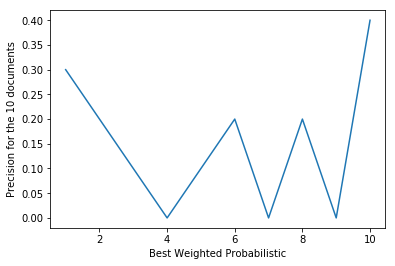

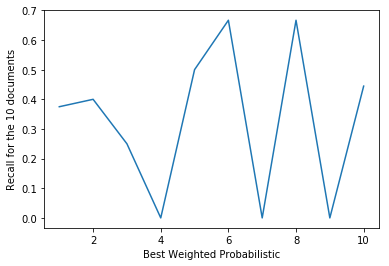

In [37]:
N = 10
precision = []
recall = []
print("================ Best Weighted Probabilistic ================")
for i in _10qry:
    #print(lst[i].head(N))
    c = 0
    #print("== RELEVANT ==")
    for j in range(N):
        if lst[i].index[j] in relevant[i%len(_10qry)]:
            #print(lst[i].index[j], end=' ')
            c+=1
    precision.append(c/N)
    recall.append(c/len(relevant[i%len(_10qry)]))
    #print("\n",relevant[i%len(_10qry)])
    #print("Query: ",(i%len(_10qry))+1)
    #print("Precision: ", '{:.3f}'.format(c/N))
    #print("Recall: ", '{:.3f}'.format(c/len(relevant[i%len(_10qry)])))
    #print("==============")
plt.plot(range(1,len(_10qry)+1),precision)
plt.ylabel('Precision for the {:} documents'.format(N))
plt.xlabel('Best Weighted Probabilistic')
plt.show()
plt.plot(range(1,len(_10qry)+1),recall)
plt.ylabel('Recall for the {:} documents'.format(N))
plt.xlabel('Best Weighted Probabilistic')
plt.show()

================ Best Weighted Probabilistic ================


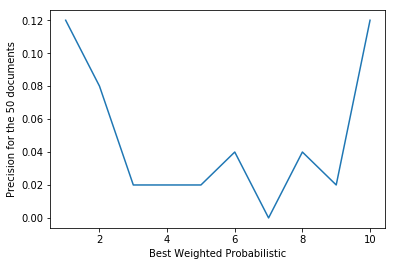

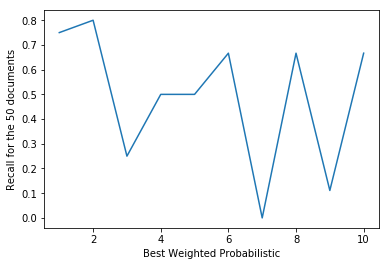

In [38]:
N = 50
precision = []
recall = []
print("================ Best Weighted Probabilistic ================")
for i in _10qry:
    #print(lst[i].head(N))
    c = 0
    #print("== RELEVANT ==")
    for j in range(N):
        if lst[i].index[j] in relevant[i%len(_10qry)]:
            #print(lst[i].index[j], end=' ')
            c+=1
    precision.append(c/N)
    recall.append(c/len(relevant[i%len(_10qry)]))
    #print("\n",relevant[i%len(_10qry)])
    #print("Query: ",(i%len(_10qry))+1)
    #print("Precision: ", '{:.3f}'.format(c/N))
    #print("Recall: ", '{:.3f}'.format(c/len(relevant[i%len(_10qry)])))
    #print("==============")
plt.plot(range(1,len(_10qry)+1),precision)
plt.ylabel('Precision for the {:} documents'.format(N))
plt.xlabel('Best Weighted Probabilistic')
plt.show()
plt.plot(range(1,len(_10qry)+1),recall)
plt.ylabel('Recall for the {:} documents'.format(N))
plt.xlabel('Best Weighted Probabilistic')
plt.show()

================ Best Weighted Probabilistic ================


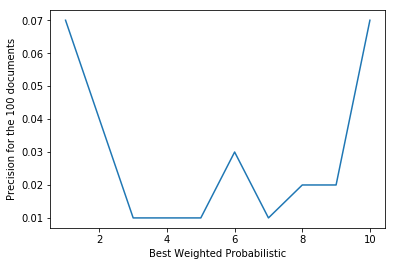

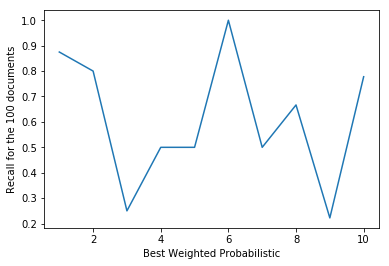

In [39]:
N = 100
precision = []
recall = []
print("================ Best Weighted Probabilistic ================")
for i in _10qry:
    #print(lst[i].head(N))
    c = 0
    #print("== RELEVANT ==")
    for j in range(N):
        if lst[i].index[j] in relevant[i%len(_10qry)]:
            #print(lst[i].index[j], end=' ')
            c+=1
    precision.append(c/N)
    recall.append(c/len(relevant[i%len(_10qry)]))
    #print("\n",relevant[i%len(_10qry)])
    #print("Query: ",(i%len(_10qry))+1)
    #print("Precision: ", '{:.3f}'.format(c/N))
    #print("Recall: ", '{:.3f}'.format(c/len(relevant[i%len(_10qry)])))
    #print("==============")
plt.plot(range(1,len(_10qry)+1),precision)
plt.ylabel('Precision for the {:} documents'.format(N))
plt.xlabel('Best Weighted Probabilistic')
plt.show()
plt.plot(range(1,len(_10qry)+1),recall)
plt.ylabel('Recall for the {:} documents'.format(N))
plt.xlabel('Best Weighted Probabilistic')
plt.show()

================ Best Weighted Probabilistic ================


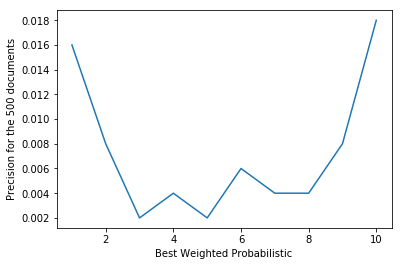

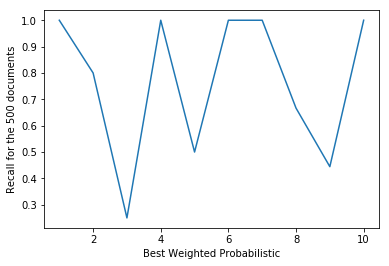

In [40]:
N = 500
precision = []
recall = []
print("================ Best Weighted Probabilistic ================")
for i in _10qry:
    #print(lst[i].head(N))
    c = 0
    #print("== RELEVANT ==")
    for j in range(N):
        if lst[i].index[j] in relevant[i%len(_10qry)]:
            #print(lst[i].index[j], end=' ')
            c+=1
    precision.append(c/N)
    recall.append(c/len(relevant[i%len(_10qry)]))
    #print("\n",relevant[i%len(_10qry)])
    #print("Query: ",(i%len(_10qry))+1)
    #print("Precision: ", '{:.3f}'.format(c/N))
    #print("Recall: ", '{:.3f}'.format(c/len(relevant[i%len(_10qry)])))
    #print("==============")
plt.plot(range(1,len(_10qry)+1),precision)
plt.ylabel('Precision for the {:} documents'.format(N))
plt.xlabel('Best Weighted Probabilistic')
plt.show()
plt.plot(range(1,len(_10qry)+1),recall)
plt.ylabel('Recall for the {:} documents'.format(N))
plt.xlabel('Best Weighted Probabilistic')
plt.show()